In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as ss
from scipy.fft import fft
from random import gauss, seed
from datetime import datetime
seed(datetime.now())

C:\Users\pabli\AppData\Local\Temp/ipykernel_7172/2440877178.py:7: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  seed(datetime.now())


In [2]:
def periodogram_smothing(signal, L, M=None, window='bartlett'):
    """
    La funcion periodogram_smothing estima la densidad espectral de potencia de la señal signal
    utilizando el metodo de Periodogram Smopthing
    
    Parametros
    ----------
        'signal': la señal con la cual se quiere trabajar
        'L': tamaño de la ventana de autocorrelación
        'M': parametro para el ancho del lobulo si se utiliza ventana bm_tukey
        'fs': frecuencia de muestreo de la señal
        'window': ventana que se desea utilizar para la autocorrelación
                    Solo soporta 'bartlett', 'parzen', 'bm_tukey'(sinc)
    """
    N = len(signal)
    
    lags = np.arange(-(N-1), N)
    rxx = ss.correlate(signal, signal, method='direct') / N
    rxx = rxx[np.logical_and(lags > -L, lags < L)]
    lags = lags[np.logical_and(lags > -L, lags < L)]

    win = None
    
    # Armo la ventana seleccionada
    if window == 'bartlett':
        win = ss.windows.bartlett(2 * L - 1) 
    elif window == 'parzen':
        win = ss.windows.parzen(2 * L - 1)
    elif window == 'bm_tukey':
        dw, t = (2 * np.pi / N) * (2 * M + 1), np.arange(-L + 1, L)
        w = np.sinc(t * dw / (2 * np.pi)) * (dw / (2*np.pi))
        win = w / max(w) # Normalizo la ventana w(0) = 1
    
    if win is None:
        raise ValueError("Unknown window.")
    
    windowed_rxx = rxx * win
    
    spectre = np.abs(fft(windowed_rxx, norm='forward')) 
    freq = np.arange(len(spectre)) / len(spectre)

    freq, spectre = freq[freq < 0.5], spectre[freq < 0.5]
    
    return freq, spectre

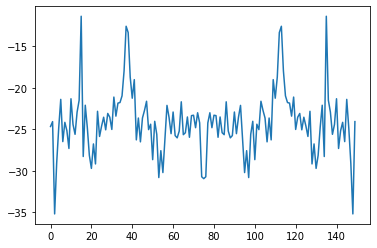

In [3]:
N = 1000
L = 150
t = np.arange(N) / N
signal = np.array([gauss(0.0, 0.3) for i in range(N)]) + np.sin(2*np.pi*100*t) + np.sin(2*np.pi*250*t) 
plt.plot(10*np.log10(np.abs(fft(signal, L))/(N)))

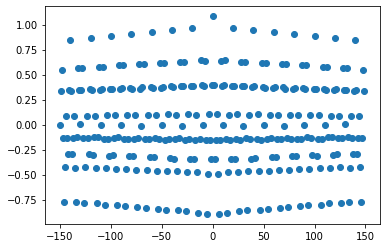

In [4]:
lags = np.arange(-(N-1), N)
rxx = ss.correlate(signal, signal, method='direct') / N
rxx = rxx[np.logical_and(lags >= -L, lags < L)]
lags = lags[np.logical_and(lags >= -L, lags < L)]
plt.scatter(lags, rxx)

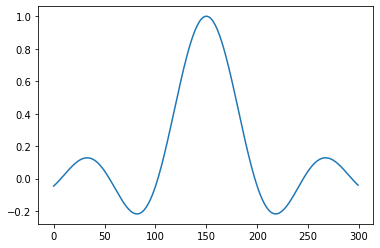

In [5]:
M = 10
dw, t = (2 * np.pi / N) * (2 * M + 1), (np.arange(-L, L))
w = np.sinc(t * dw / (2 * np.pi)) * (dw / (2*np.pi))
win = w / max(w) # Normalizo la ventana w(0) = 1
#win = ss.windows.parzen(2*L) 
plt.plot(win)

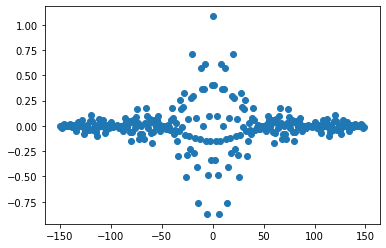

In [6]:
windowed_rxx = rxx * win
plt.scatter(lags, windowed_rxx)

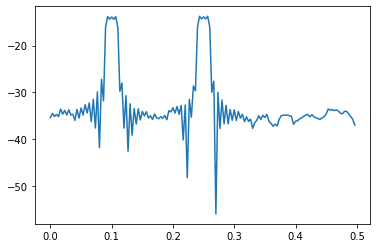

In [7]:
spectre = np.abs(fft(windowed_rxx, norm='forward')) 
freq = np.arange(len(spectre)) / len(spectre)

freq, spectre = freq[freq < 0.5], spectre[freq < 0.5]

plt.plot(np.abs(freq), 10* np.log10(np.abs(spectre)))